# Lab 5 (Due @ by 11:59 pm via Canvas/Gradescope)

## Group Work

You are encouraged to work in groups for this Lab, however each student should submit their own notebook file to Gradescope. While you will be able to do this on your own, talking through the problem with your group could help speed up both understanding and arriving at a solution. 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
from copy import copy
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pca import pca

# K-Means

In this problem you will use the `wine.csv` data set available in the Canvas Labs Module. These data consist of 13 chemical compositions from three batches of wine bottles at an Italian vineyard. We are going to use K-Means to (a) see how many clusters naturally occur in the data and (b) determine if these clusters are formed based on the batches.

The cells below read in the data and then define the x-feature list.

In [2]:
df_wine = pd.read_csv('wine.csv')
df_wine.head()

,batch,chem1,chem2,chem3,chem4,chem5,chem6,chem7,chem8,chem9,chem10,chem11,chem12,chem13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
x_feat_list = list(df_wine.columns[1:])

## Part 1: Choosing K (5 points)

Decide what the optimal clustering of the data are using K-Means. To do this, create a copy of `df_wine` and scale the x-features using scale normalization. Then, fit the K-Means algorithm for choices of $k$ from 2 to 15, keeping track of the mean distance squared for each choice of $k$. Plot the number of clusters (x-axis) against the mean distance (y-axis) and then **in a markdown cell** discuss what your choice of $k$ is.

$\color{red}{\text{Solution:}}$

In [4]:
df_wine_scaled = copy(df_wine)

# scale normalization of numeric variables
for feat in x_feat_list:
    df_wine_scaled[feat] = df_wine_scaled[feat] / df_wine_scaled[feat].std()

x = df_wine_scaled.loc[:, x_feat_list].values

mean_d_dict = dict()
for n_clusters in range(2, 16):
    # fit kmeans
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(x)
    y = kmeans.predict(x)    
        
    # compute & store mean distance
    mean_d = -kmeans.score(x)
    mean_d_dict[n_clusters] = mean_d

Text(0, 0.5, 'mean dist^2 to centroid')

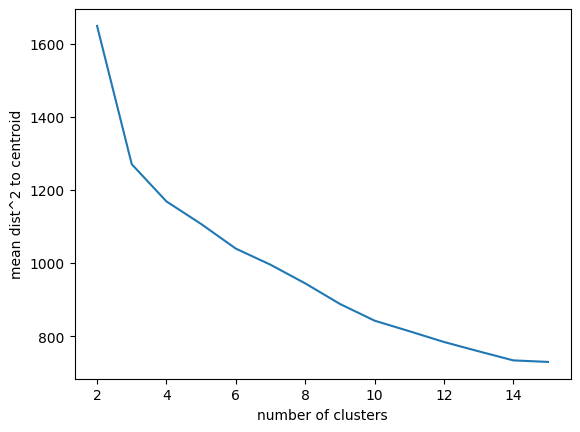

In [5]:
plt.plot(mean_d_dict.keys(), mean_d_dict.values())
plt.xlabel('number of clusters')
plt.ylabel('mean dist^2 to centroid')

I choose $k=3$, partially because I expect three clusters to make most sense (because of the batches), but also because it looks like the most pronounced elbow in the plot.

## Part 2: Fitting K-means (3 points)

Regardless of your choice of $k$ from Part 1, fit K-Means with $k=3$, and then save the cluster assignments to the original `df_wine`. Show the `.head()` of this data frame to show your cluster assignments worked.

$\color{red}{\text{Solution:}}$

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y = kmeans.predict(x)
df_wine['cluster'] = y
df_wine.head()

,batch,chem1,chem2,chem3,chem4,chem5,chem6,chem7,chem8,chem9,chem10,chem11,chem12,chem13,cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## Part 3: Batch Clusters? (3 points)

Run the code below, then **in a markdown cell** discuss whether it looks like K-Means is choosing the clusters based on the batches of wine (i.e. that the chemical compositions of the wine bottles contain information about which batch they come from).

In [7]:
bool_cluster0 = df_wine['cluster'] == 0
bool_cluster1 = df_wine['cluster'] == 1
bool_cluster2 = df_wine['cluster'] == 2
clust0 = df_wine.loc[bool_cluster0,:]
Counter(clust0['batch'])

Counter({2: 65})

In [8]:
clust1 = df_wine.loc[bool_cluster1,:]
Counter(clust1['batch'])

Counter({1: 59, 2: 3})

In [9]:
clust2 = df_wine.loc[bool_cluster2,:]
Counter(clust2['batch'])

Counter({2: 3, 3: 48})

$\color{red}{\text{Solution:}}$

There is definitely information about batches in the chemical compositions; the clusters mostly align with batch when we use $k=3$. For example, one of the clusters is made up entirely of batch 2 bottles, while all of the batch 1 bottles are in a single cluster (with a few batch 2) and the same for batch 3 bottles.

## Part 4: Further Discussion (4 points)

Consider a second choice of $k$, your choice of any $k>3$ (refer to the plot from Part 1 to make your choice). Suppose you are working with a wine expert who is very familiar with the specific chemical compositions that are being measured in these bottles. **In a markdown cell**, explain why it might make more sense to examine $k>3$ clusters than $k=3$. In other words, what sort of insights might the expert be able to glean from investigating more clusters than just those that seem to cluster based on batch?

$\color{red}{\text{Solution:}}$

It might make more sense because the expert could see what sort of groupings there are within each batch based on the chemical compositions; i.e. if there are certain sub-clusters of each batch that have more of one chemical than another and perhaps have some influence on taste/acidity/quality of the wine.

# PCA

For the next two parts, you will use the `pet_imgs.npy` array that is available in the Labs Module on Canvas. It is an array of 513 grayscale 128 by 128 pixel pet images (cats and dogs). Our goal will be to conduct PCA using these images to compress them, storing the images based on principal components. The cells below read in the data, create a plot function (and provide an example using Dr. Gerber's dog, Lafayette), and then writes the function used for recovering an image based on the compressed data.

In [10]:
pet_data = np.load("pet_imgs.npy", allow_pickle=True)
pet_data

array([[  8.   ,   8.   ,   8.   , ...,  11.664,  11.33 ,  11.33 ],
       [ 79.645,  82.645,  75.645, ..., 169.983, 166.981, 166.647],
       [127.328, 128.995, 129.993, ...,   7.666,  26.998,  42.997],
       ...,
       [103.339, 119.004, 131.005, ...,  88.029, 187.367, 157.041],
       [ 22.668,  22.335,  27.002, ...,  57.661,  54.325,  41.993],
       [214.003, 210.001, 215.334, ..., 165.668, 180.668, 160.668]])

In [11]:
def plot_pet(x, im_shape = (128,128)):
    """ plots a pet image
    
    Args:
        x (np.array): one feature per pixel array
            (higher values are darker)
        im_shape (tuple): shape of image
    """
    x = x.reshape(im_shape)
    plt.imshow(x)
    plt.xticks([])
    plt.yticks([])
    plt.gcf().set_size_inches(10, 10)

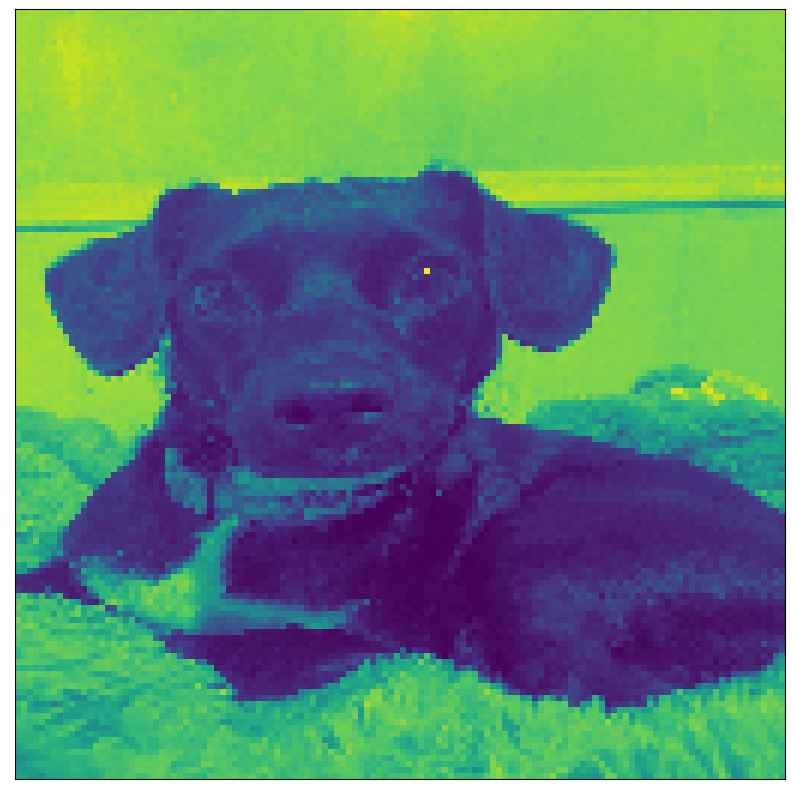

In [12]:
plot_pet(pet_data[512,:])

In [13]:
def inverse_transform(x_compress, pca, limit_coef=None):
    """ estimates original sample given compressed pca coef
    
    PCA from sklearn has their own implementation, but they
    always use all the features.  to play guess that pokemon below
    we want to limit ourselves to using on the first few
    
    Args:
        x_compress (np.array): the pca coefficients
            (see c_0, c_1, ... above).  these describe how
            much "red line" and how much "blue line" etc
        pca (PCA): sklearn's pca object
        limit_coef (int): we predict using only the first
            limit_coef coefficients
            
    Returns:
        x_pred (np.array): the estimated image, same shape
            as the original input image
    """
    if limit_coef is None:
        # default to all components
        limit_coef = pca.n_components_
    
    # initialize prediction to mean
    x_pred = pca.mean_
        
    # add pca directions one by one
    for coef_idx in range(limit_coef):
        coef = x_compress[coef_idx]
        comp = pca.components_[coef_idx, :]
        x_pred += coef * comp
        
    return x_pred

## Part 5: Image Compression (2 points)

Conduct PCA using the `pet_data`, saving the fit as `petimg_data_compress`.

$\color{red}{\text{Solution:}}$

In [14]:
# the default n_components will have PCA build as 
# many components as there are min(obs, feat).  this is preferred
# here as we can use our limit_coef param as needed
pca = PCA()

# compress all pokemon to lower dimensional representation
petimg_data_compress = pca.fit_transform(pet_data)

## Part 6: How many PCs to keep + Discussion (8 points)

Someone who had worked in image compression before suggests three common benchmarks for choosing how many principal components to keep; 50%, 75% and 95% total variation explained. To determine which PC achieves each benchmark, you can use (for example, to find 50%):

    bench0 = np.argmax(pca.explained_variance_ratio_.cumsum() >= .5)
    print(bench0)

Based on the three common benchmarks, use the `inverse_transform()` and `plot_pet()` functions to plot the compressed image of Lafayette (image index `512`). To do this for the first benchmark (calculated via the line of code above) you would do:

    lafayette_50p = inverse_transform(petimg_data_compress[512,], pca, limit_coef=bench0)
    
When you are finished, **in a markdown cell** discuss which of the benchmarks you think is best to use for compressing the pet images based on how well it seems the picture of Lafayette is recovered at each benchmark, **making sure** to mention how many principal components you are keeping based on that benchmark.

$\color{red}{\text{Solution:}}$

In [15]:
bench0 = np.argmax(pca.explained_variance_ratio_.cumsum() >= .5)
print(bench0)
bench1 = np.argmax(pca.explained_variance_ratio_.cumsum() >= .75)
print(bench1)
bench2 = np.argmax(pca.explained_variance_ratio_.cumsum() >= .95)
print(bench2)

7
42
260


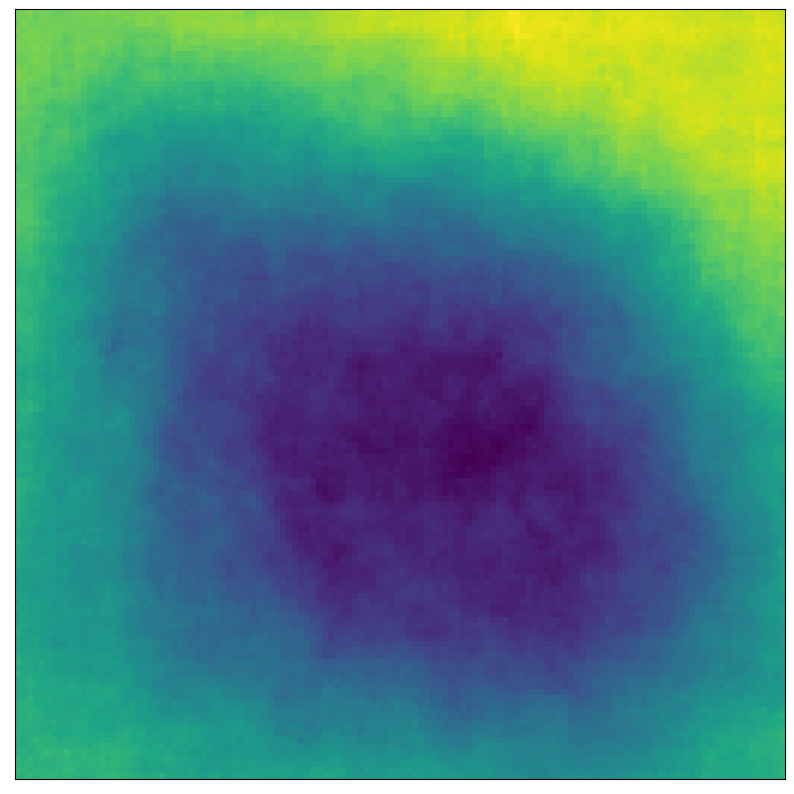

In [16]:
lafayette_50p = inverse_transform(petimg_data_compress[512,], pca, limit_coef=bench0)
plot_pet(lafayette_50p)

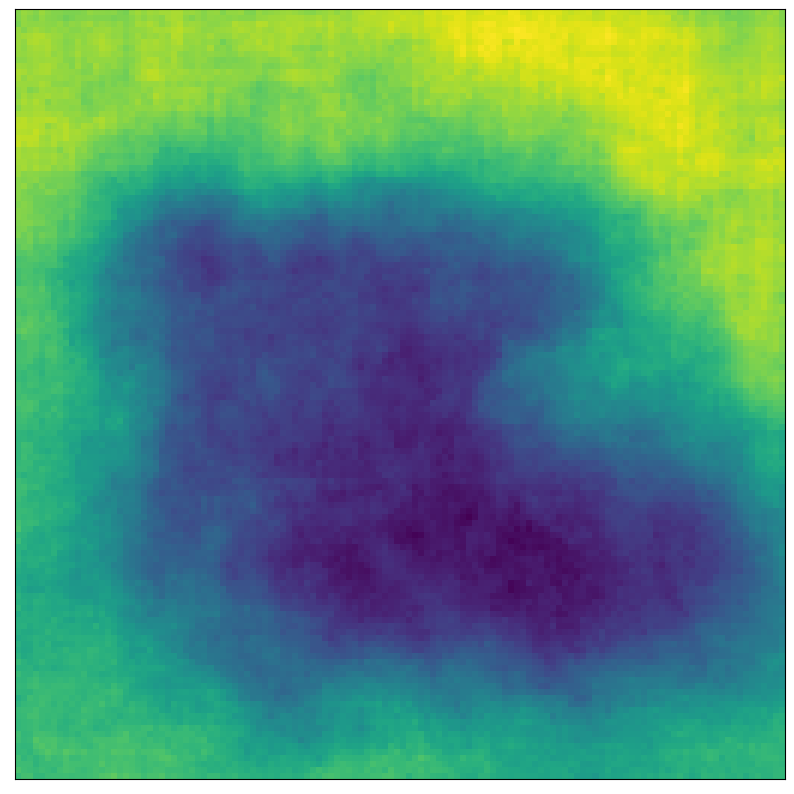

In [17]:
lafayette_75p = inverse_transform(petimg_data_compress[512,], pca, limit_coef=bench1)
plot_pet(lafayette_75p)

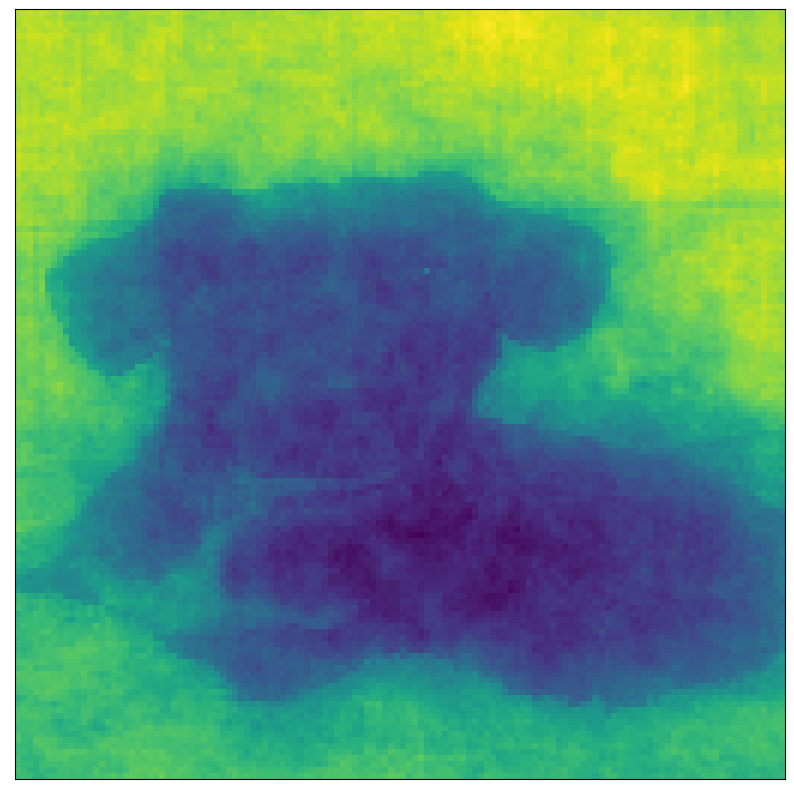

In [18]:
lafayette_95p = inverse_transform(petimg_data_compress[512,], pca, limit_coef=bench2)
plot_pet(lafayette_95p)

Of the choices, I would keep the 95% benchmark which represents the first 260 principal components which is a bit more than half of them. I don't think that the 75% is good enough to say that the image is recovered very well, and 50% is certainly not enough.